## Business Overview


### Introduction 
As data scientist we have been tasked by a real estate agency to asses the factors that affect the selling price of houses from a dataset that contains data of houses sold in King County, Washington, USA between May 2014 and May 2015.

## Business Understanding

The real estate agency needs to provide homeowners with accurate and reliable information about the potential increase in home value due to different factors. We will use the King County House Sales dataset to analyze the factors that lead to the change in home value.The analysis is to help them understand and predict the real estate industry . 


## Data Understanding

In [2]:
# importing neccesary libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [3]:
# loading our data
df = pd.read_csv(r'data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation & Cleaning

### Handling Missing Values 


In [7]:
#checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# dropping missing values 
df.dropna(inplace=True)
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# checking for duplicatas
df.duplicated().sum()

0

In [10]:
# checking for outliers for Price 
df['price'].head()

1     538000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
Name: price, dtype: float64

### Cleaning price column

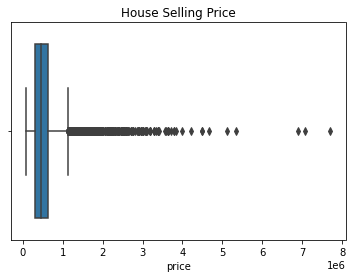

In [11]:
# visualizing outliers 

sns.boxplot(x = df.price)
plt.title('House Selling Price')
plt.show()

In [12]:
def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column

In [13]:
#remove price outliers
price = remove_outliers(df.price,5)
price

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15672, dtype: float64

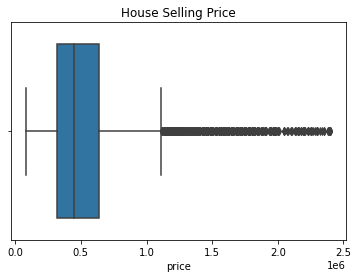

In [14]:
#review price

sns.boxplot(x = price)
plt.title('House Selling Price')
plt.show()

### Cleaning Square foot living column

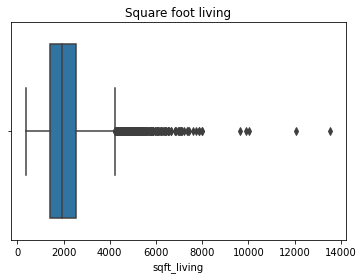

In [15]:
# visualizing Square foot living outliers 

sns.boxplot(x = df.sqft_living)
plt.title('Square foot living')
plt.show()

In [16]:
#remove Square foot living outliers
sqft_living = remove_outliers(df.sqft_living,5)

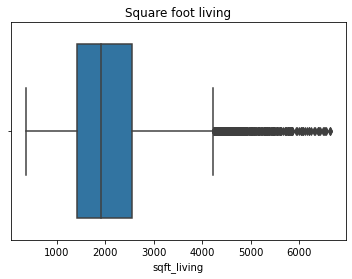

In [17]:
#review Square foot living

sns.boxplot(x = sqft_living)
plt.title('Square foot living')
plt.show()

### Cleaning Square foot lot column

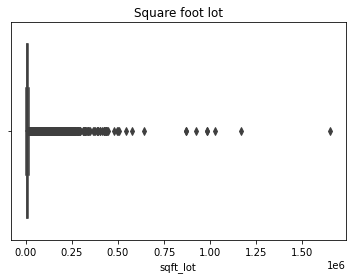

In [18]:
# visualizing Square foot lot outliers 

sns.boxplot(x = df.sqft_lot)
plt.title('Square foot lot')
plt.show()

In [19]:
#remove Square foot lot outliers
sqft_lot = remove_outliers(df.sqft_lot,3)

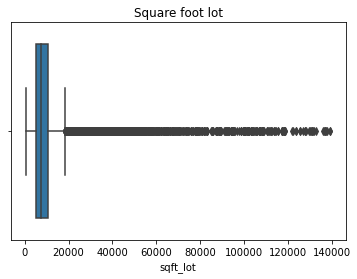

In [20]:
#review Square foot lot

sns.boxplot(x = sqft_lot)
plt.title('Square foot lot')
plt.show()

### Cleaning Bedrooms Column

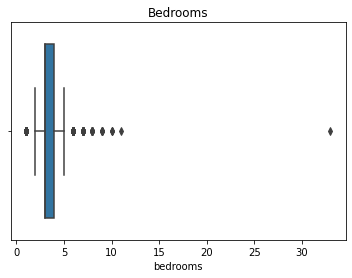

In [21]:
#visualizing bedrooms column
sns.boxplot(x = df.bedrooms)
plt.title('Bedrooms')
plt.show()

In [22]:
#remove bedrooms outliers
bedrooms = remove_outliers(df.bedrooms,3)



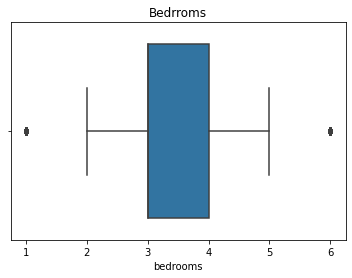

In [23]:
#review Bedrooms

sns.boxplot(x = bedrooms)
plt.title('Bedrroms')
plt.show()

### Cleaning Bathrooms Columns
    

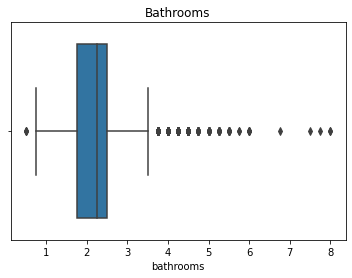

In [24]:
#visualizing bedrooms column
sns.boxplot(x = df.bathrooms)
plt.title('Bathrooms')
plt.show()

In [25]:
#remove outliers in bathrooms column
bathrooms = remove_outliers(df.bathrooms,3)
bathrooms

1        2.25
3        3.00
4        2.00
6        2.25
8        1.00
         ... 
21591    2.50
21592    2.50
21593    2.50
21594    0.75
21596    0.75
Name: bathrooms, Length: 15625, dtype: float64

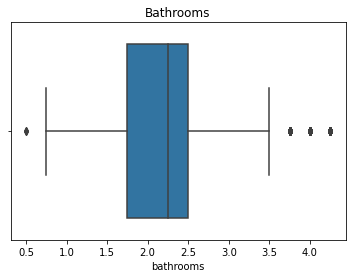

In [26]:
#reviewing bathrooms
sns.boxplot(x = bathrooms)
plt.title('Bathrooms')
plt.show()

### Cleaning Square Feet Above Column

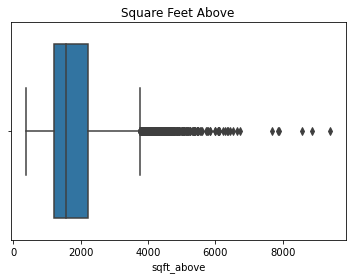

In [27]:
#visualizing Square Feet Above column
sns.boxplot(x = df.sqft_above)
plt.title('Square Feet Above')
plt.show()

In [28]:
#remove outliers
sqft_above_ground = remove_outliers(df.sqft_above,5)

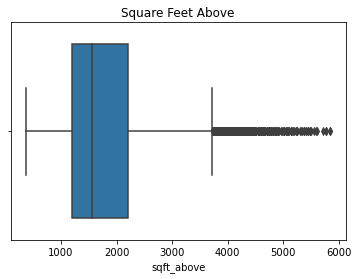

In [29]:
#review Square Feet Above
sns.boxplot(x = sqft_above_ground)
plt.title('Square Feet Above')
plt.show()


### Cleaning grade column 

In [30]:
#strip grade column and remain with grade as a number
df2 = df
df2.new_grade = df2.grade.str[:1]
df2.new_grade
df2.grade = df2.new_grade

<ipython-input-30-f209bbb5002d>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.new_grade = df2.grade.str[:1]


In [31]:
df = df2

In [32]:
#change grade from str to int
df.grade = df.grade.astype('int')

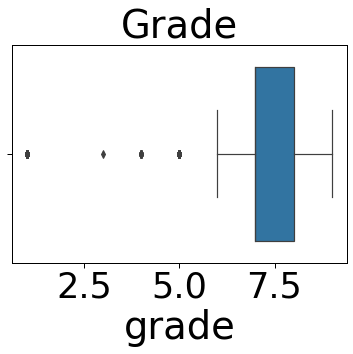

In [50]:
#visualizing grades column
sns.boxplot(x = df.grade)
plt.title('Grade')
plt.show()

In [51]:
#remove outliers
grade = remove_outliers(df.grade,1.5)

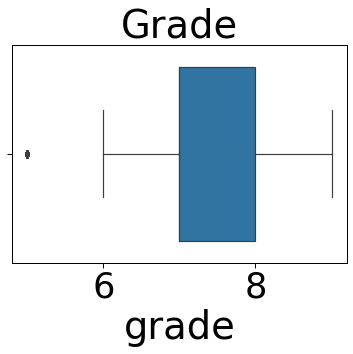

In [52]:
#review Grade Above
sns.boxplot(x = grade)
plt.title('Grade')
plt.show()

In [54]:
processed_df = pd.concat([price, sqft_lot, sqft_living, sqft_above_ground, bathrooms, bedrooms,grade, df.loc[:, ["condition", "waterfront", "yr_built", "view"]]], axis=1, join='inner')
processed_df

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,grade,condition,waterfront,yr_built,view
1,538000.0,7242,2570,2170,2.25,3,7,Average,NO,1951,NONE
3,604000.0,5000,1960,1050,3.00,4,7,Very Good,NO,1965,NONE
4,510000.0,8080,1680,1680,2.00,3,8,Average,NO,1987,NONE
6,257500.0,6819,1715,1715,2.25,3,7,Average,NO,1995,NONE
8,229500.0,7470,1780,1050,1.00,3,7,Average,NO,1960,NONE
...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,1294,1310,1180,2.50,3,8,Average,NO,2008,NONE
21592,360000.0,1131,1530,1530,2.50,3,8,Average,NO,2009,NONE
21593,400000.0,5813,2310,2310,2.50,4,8,Average,NO,2014,NONE
21594,402101.0,1350,1020,1020,0.75,2,7,Average,NO,2009,NONE


## Visualization

### Linearity of the variables

In [34]:
#scatter plots to show linearity
#sns.pairplot(processed_df)
#plt.show();

### Correlation between Variables

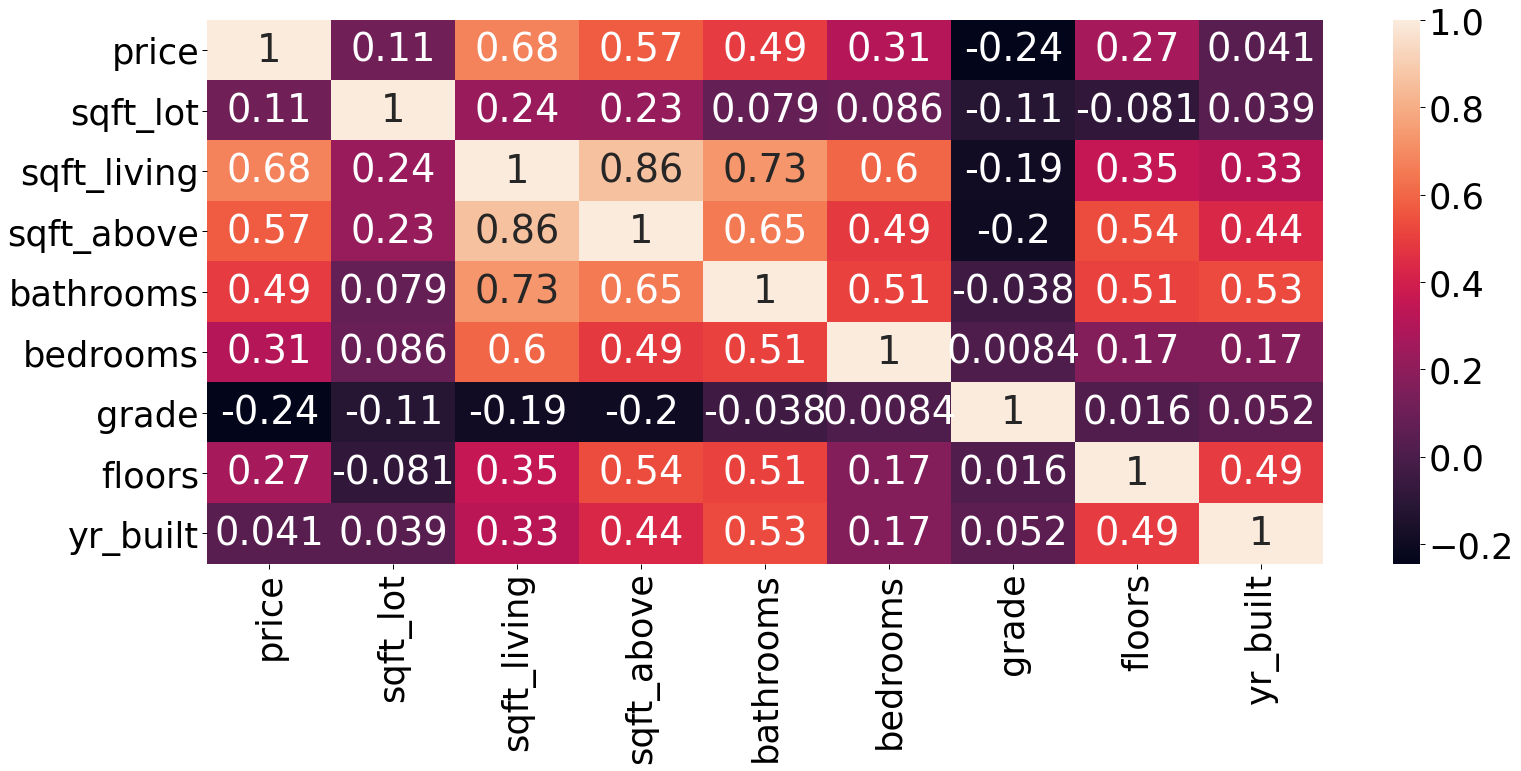

In [35]:
#heatmap to show correlation
plt.figure(figsize=(25,10))
sns.set_context("paper",font_scale=4)
sns.heatmap(processed_df.corr(),annot=True)
plt.show()

## Regression models

### Simple Linear Regression Model - Price vs Sqft_living

In [36]:
regression_1 = smf.ols('price ~ sqft_living',data = processed_df).fit()
regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:18:12   Log-Likelihood:            -2.0956e+05
No. Observations:               15280   AIC:                         4.191e+05
Df Residuals:                   15278   BIC:                         4.191e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.925e+04   4673.825      6.258      0.000    2.01e+04    3.84e+04
sqft_living   240.8428      2.127    113.227      0.000     236.673     245.012
==============================================================================
Omnibus:                     4855.914   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23266.109
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       8.281   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

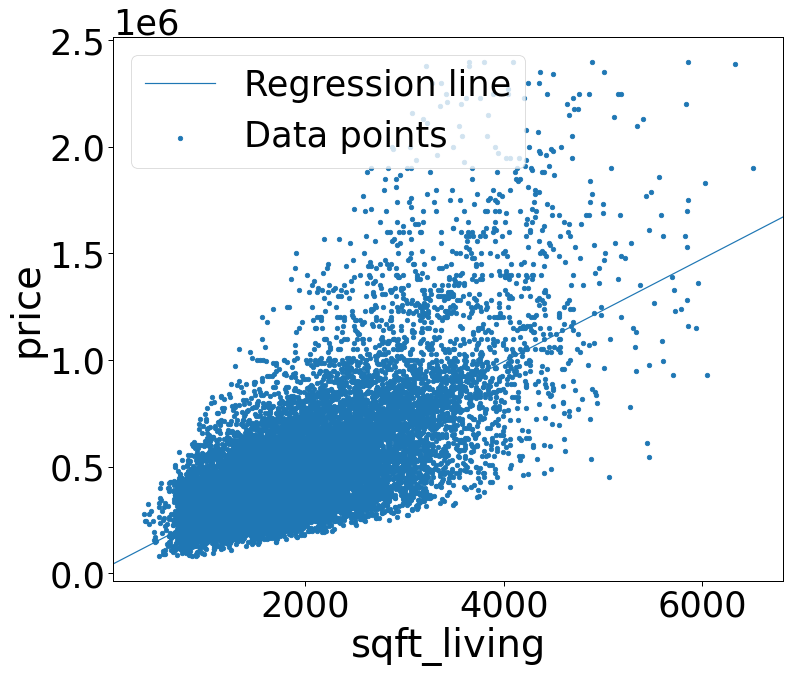

In [39]:
fig, ax = plt.subplots(figsize = (12,10))
processed_df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=regression_1, label="Regression line", ax=ax)
ax.legend();

### Simple Linear Regression Model - Price vs Sqft_above

In [40]:
regression_2 = smf.ols('price ~ sqft_above',data = processed_df).fit()
regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     7536.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:21:40   Log-Likelihood:            -2.1115e+05
No. Observations:               15280   AIC:                         4.223e+05
Df Residuals:                   15278   BIC:                         4.223e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.291e+05   4902.139     26.345      0.000     1.2e+05    1.39e+05
sqft_above   222.8262      2.567     86.808      0.000     217.795     227.858
==============================================================================
Omnibus:                     5616.991   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28185.503
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       8.701   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

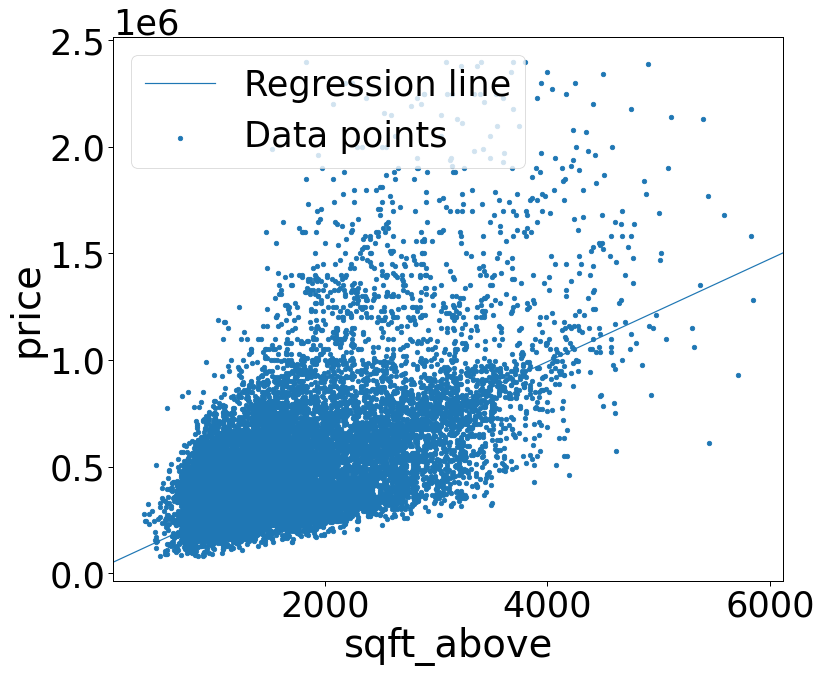

In [41]:
fig, ax = plt.subplots(figsize = (12,10))
processed_df.plot.scatter(x="sqft_above", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=regression_1, label="Regression line", ax=ax)
ax.legend();